In [1]:
from numpy import loadtxt
import numpy as np
import math
import matplotlib.pyplot as plt

#Loading Data Files
#Features
trainingData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/trainingData.txt", delimiter=",",unpack=False,dtype=np.float128)
testData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/testData.txt", delimiter=",", unpack=False,dtype=np.float128)
validationData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/validationData.txt", delimiter=",",unpack=False,dtype=np.float128)

#Labels
trainingLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/trainingLabels.txt",unpack=False)
testLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/testLabels.txt",unpack=False)
validationLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/validationLabels.txt",unpack=False)

In [17]:
#Function to calculate gradient
def calculate_gradient(w,lamda):
    x=trainingData
    y=trainingLabels
    gradient=0
    N=len(y)
    for xi,yi in zip(x,y):
        product=yi*np.dot(w,np.transpose(xi))
        if product<1:
            gradient+=((-1*yi)/N)*(xi).T
    gradient=np.reshape(gradient,(1,784))
    gradient+=lamda*w
    return gradient

#Main Function for Gradient Descent
def gradient_descent(T,learning_rate,lamda):
    w=np.zeros((1,784), dtype=np.float128)
    for t in range(1,T+1):
        gradient=calculate_gradient(w,lamda)
        w-=(learning_rate*gradient)
    return w

#Function to calculate Risk
def calculate_risk(w,x,y,lamda):
    predictions=np.dot(x,np.transpose(w))
    N=len(y)
    y=y.reshape((N,1))
    values=1-np.multiply(y,predictions)
    risk=np.sum(values.clip(0))/N + lamda*np.sum(np.square(w))
    return risk

In [20]:
#10 different Learning rates
#Training and Validation risk for each learning rate
print('Training and Validation risk for 63 (learning rates,Lambda) combinations')
print('Learning rates:0.000001,0.000005,0.00001,0.00005,0.0001,0.005,0.001,0.01,1')
print('Lambda:0.0001,0.001,0.01,0.1,0,1,10')
print('\n')

validation_risk_dictionary={}
training_risk_dictionary={}
T=500
for learning_rate in [0.000001,0.000005,0.00001,0.00005,0.0001,0.005,0.001,0.01,1]:
    for lamda in [0.0001,0.001,0.01,0.1,0,1,10]:
        
        print('Gradient Descent for learning_rate:',learning_rate,'and lamda:',lamda)
        w=gradient_descent(T,learning_rate,lamda)
        
        print('calculating Validation risk for learning_rate:',learning_rate,'and lamda:',lamda)
        validation_risk=calculate_risk(w,validationData,validationLabels,lamda)
        validation_risk_dictionary[(learning_rate,lamda)]=validation_risk
        
        print('calculating Training risk for learning_rate:',learning_rate,'and lamda:',lamda)
        training_risk=calculate_risk(w,trainingData,trainingLabels,lamda)
        training_risk_dictionary[(learning_rate,lamda)]=training_risk
        print('\n')

print('\n')
print('Training Risk for 63 Combinations of Learning rate and Lambda')
print(training_risk_dictionary)
print('\n\n')

print('Validation Risk for 63 Combinations of Learning rate and Lambda')
print(validation_risk_dictionary)
print('\n\n')

#Learning_rate which yields least validation_error
learning_rate,lamda=min(validation_risk_dictionary, key=validation_risk_dictionary.get)
print("learning_rate for least validation risk",learning_rate)
print("lambda for least validation risk",lamda)
print('validation risk for learning rate:',learning_rate,'and lambda:',lamda,'is:',validation_risk_dictionary[(learning_rate,lamda)])

Training and Validation risk for 54 (learning rates,Lambda) combinations
Learning rates:0.000001,0.000005,0.00001,0.00005,0.0001,0.005,0.001,0.01,1
Lambda:0.0001,0.001,0.01,0.1,0,1,10


Gradient Descent for learning_rate: 1e-06 and lamda: 0.0001
calculating Validation risk for learning_rate: 1e-06 and lamda: 0.0001
calculating Training risk for learning_rate: 1e-06 and lamda: 0.0001


Gradient Descent for learning_rate: 1e-06 and lamda: 0.001
calculating Validation risk for learning_rate: 1e-06 and lamda: 0.001
calculating Training risk for learning_rate: 1e-06 and lamda: 0.001


Gradient Descent for learning_rate: 1e-06 and lamda: 0.01
calculating Validation risk for learning_rate: 1e-06 and lamda: 0.01
calculating Training risk for learning_rate: 1e-06 and lamda: 0.01


Gradient Descent for learning_rate: 1e-06 and lamda: 0.1
calculating Validation risk for learning_rate: 1e-06 and lamda: 0.1
calculating Training risk for learning_rate: 1e-06 and lamda: 0.1


Gradient Descent for lea

calculating Validation risk for learning_rate: 0.005 and lamda: 10
calculating Training risk for learning_rate: 0.005 and lamda: 10


Gradient Descent for learning_rate: 0.001 and lamda: 0.0001
calculating Validation risk for learning_rate: 0.001 and lamda: 0.0001
calculating Training risk for learning_rate: 0.001 and lamda: 0.0001


Gradient Descent for learning_rate: 0.001 and lamda: 0.001
calculating Validation risk for learning_rate: 0.001 and lamda: 0.001
calculating Training risk for learning_rate: 0.001 and lamda: 0.001


Gradient Descent for learning_rate: 0.001 and lamda: 0.01
calculating Validation risk for learning_rate: 0.001 and lamda: 0.01
calculating Training risk for learning_rate: 0.001 and lamda: 0.01


Gradient Descent for learning_rate: 0.001 and lamda: 0.1
calculating Validation risk for learning_rate: 0.001 and lamda: 0.1
calculating Training risk for learning_rate: 0.001 and lamda: 0.1


Gradient Descent for learning_rate: 0.001 and lamda: 0
calculating Validatio

In [21]:
#Function used to generate list of empirical risk for iterations 1 to T
def Empiricial_risk_vs_iterations(T,learning_rate,lamda):
    w=np.zeros((1,784), dtype=np.float128)
    list_empirical_risk=[]
    for t in range(1,T+1):
        gradient=calculate_gradient(w,lamda)
        w-=(learning_rate*gradient)
        empirical_risk=calculate_risk(w,trainingData,trainingLabels,lamda)
        list_empirical_risk.append(empirical_risk)
    return list_empirical_risk

#list of empirical risk values, for iterations from 1 to 1000
T=500
list_empirical_risk=Empiricial_risk_vs_iterations(T,learning_rate,lamda)

In [26]:
#list_empirical_risk

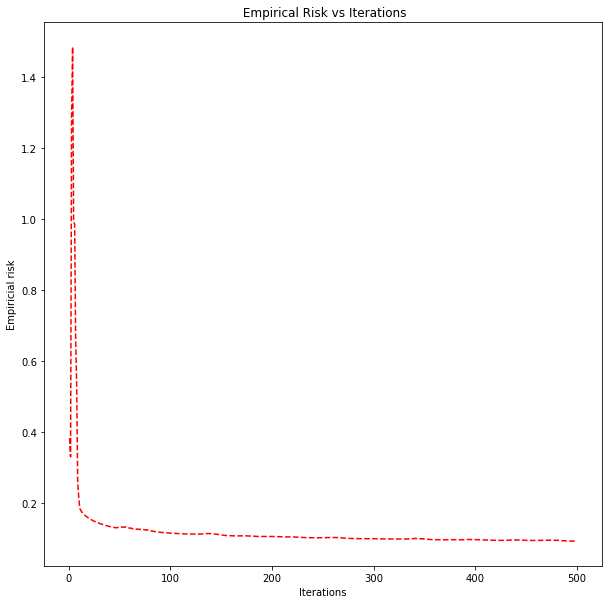

Iteration which produces least empirical risk: 500


In [27]:
#Plot Empirical Risk vs Iterations
plt.figure(figsize=(10,10))
plt.plot(range(1,501), list_empirical_risk, 'r--')
plt.ylabel('Empiricial risk')
plt.xlabel('Iterations')
plt.title(' Empirical Risk vs Iterations')
plt.show()

#Find number of iterations which gives minimum risk 
number_of_iterations=list_empirical_risk.index(min(list_empirical_risk))+1
print("Iteration which produces least empirical risk:",number_of_iterations)

In [28]:
#Final Model
#Best model using the learning rate and number_of_iterations found
w=gradient_descent(number_of_iterations,learning_rate,lamda)
test_risk=calculate_risk(w,testData,testLabels,lamda)
print("best model: learning rate:",learning_rate,'and lamda:',lamda,' for iterations:',number_of_iterations)
print('Test Risk of the best model:',test_risk)

print('\nNote:')
print('Test Risk:',test_risk, 'and Validation error:', validation_risk_dictionary[(learning_rate,lamda)],'are close')
print('Empirical Risk reduces as iterations increase as expected')

best model: learning rate: 5e-06 and lamda: 0.01  for iterations: 500
Test Risk of the best model: 0.106093883233

Note:
Test Risk: 0.106093883233 and Validation error: 0.111614478706 are close
Empirical Risk reduces as iterations increase as expected
